In [21]:
%matplotlib notebook
from ipywidgets import interact_manual, Dropdown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import re

In [6]:
data = []
with open("./runs/overnight_15to16Oct2017_ProjectNetwork.log", 'r') as f:
    for line in f.readlines():
        data.append(json.loads(line))

In [7]:
traffic = pd.DataFrame(data)

In [8]:
traffic.sample(10)

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url,url_index
114466,None,None,44471,200,True,0.049425,1508225246,http://www.apple.com,2
20233,None,None,170512,200,True,0.265073,1508207610,http://www.microsoft.com,3
158345,SSLError,"SSLError(SSLError(SSLError(""bad handshake: Err...",-1,-1,False,-1.000000,1508233412,https://gsep.daimler.com/confluence,5
114695,None,None,12693,200,True,0.192678,1508225294,http://www.google.com,0
4250,None,None,227095,200,True,0.353667,1508204589,http://www.facebook.com,1
174272,None,None,12695,200,True,0.177937,1508236369,http://www.google.com,0
234708,SSLError,"SSLError(SSLError(SSLError(""bad handshake: Err...",-1,-1,False,-1.000000,1508247642,https://gsep.daimler.com/confluence,5
170736,SSLError,"SSLError(SSLError(SSLError(""bad handshake: Err...",-1,-1,False,-1.000000,1508235717,https://gsep.daimler.com/stash,5
246861,SSLError,"SSLError(SSLError(SSLError(""bad handshake: Err...",-1,-1,False,-1.000000,1508249905,https://gsep.daimler.com/stash,5
165345,SSLError,"SSLError(SSLError(SSLError(""bad handshake: Err...",-1,-1,False,-1.000000,1508234715,https://gsep.daimler.com/confluence,5


In [9]:
traffic.shape

(269752, 9)

In [11]:
traffic.groupby(['url']).count()

,error,error_message,resp_str_length,response_code,response_ok,response_time,unixtime,url_index
url,,,,,,,,
http://mbusa.com,103,103,38536,38536,38536,38536,38536,38536
http://www.apple.com,89,89,38536,38536,38536,38536,38536,38536
http://www.facebook.com,169,169,38536,38536,38536,38536,38536,38536
http://www.google.com,92,92,38536,38536,38536,38536,38536,38536
http://www.microsoft.com,103,103,38536,38536,38536,38536,38536,38536
https://gsep.daimler.com/confluence,38536,38536,38536,38536,38536,38536,38536,38536
https://gsep.daimler.com/stash,38536,38536,38536,38536,38536,38536,38536,38536


In [38]:
url_picker = Dropdown(
    options=['all']+list(traffic.url.unique()),
    value=(['all']+list(traffic.url.unique()))[0],
    description='URL',
    disabled=False,
)

def draw_traffic(url):
    fig, ax = plt.subplots(figsize=(8,6))
    if url == 'all':
        plt.title('All traffic')
        traffic.plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
    else:
        plt.title(traffic[traffic['url']==url]['url'].unique()[0])
        traffic[traffic['url']==url].plot(x='unixtime', y='response_time', ax=ax, kind='scatter')
        
    matches = re.match("https?:\/\/(www)?\.(.+)\.(.+)",url)
    if url == 'all':
        fig.savefig('./plots/all_traffic.png')
    else:
        fig.savefig('./plots/{}_traffic.png'.format(matches.group(1)))
interact_manual(draw_traffic, url=url_picker);#

<IPython.core.display.Javascript object>


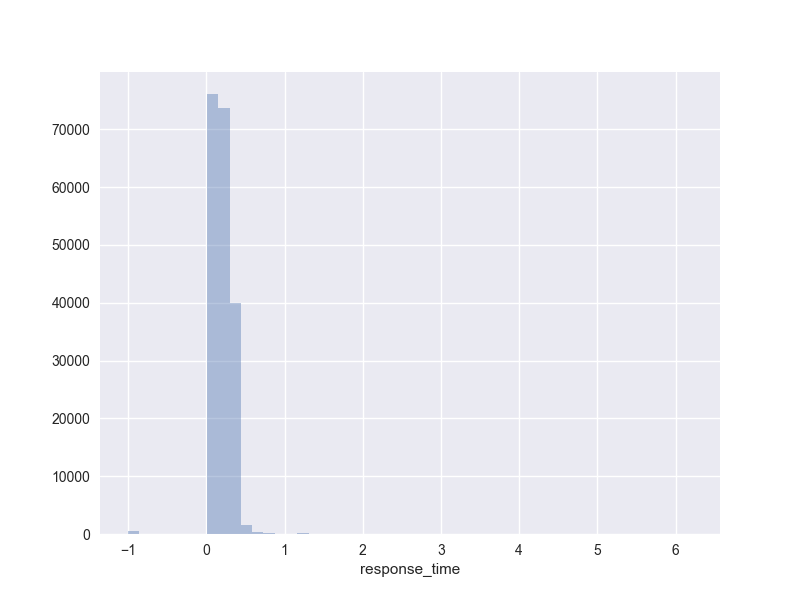

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
plt_data = traffic[
    (traffic['url'] != 'https://gsep.daimler.com/confluence' ) &
    (traffic['url'] != 'https://gsep.daimler.com/stash')]
sns.distplot(plt_data.response_time, ax=ax, kde=False)
fig.savefig('./plots/response_time.png')

In [8]:
traffic['response_code'].unique()

array([200])

<IPython.core.display.Javascript object>


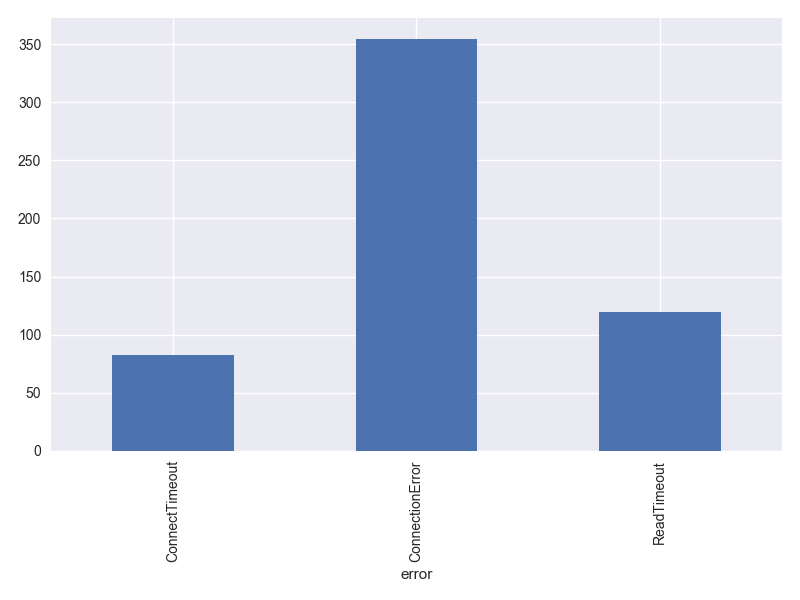

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
plt_data.groupby(['error']).count()['url_index'].plot(kind='bar', ax=ax)
plt.tight_layout()
fig.savefig('./plots/error_dist.png')